In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [36]:
data=pd.read_csv('Mall_Customers.csv')

In [37]:
print(data.shape)

(200, 5)


In [38]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [40]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [41]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [42]:
X = data.iloc[:,[3,4]].values

In [43]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

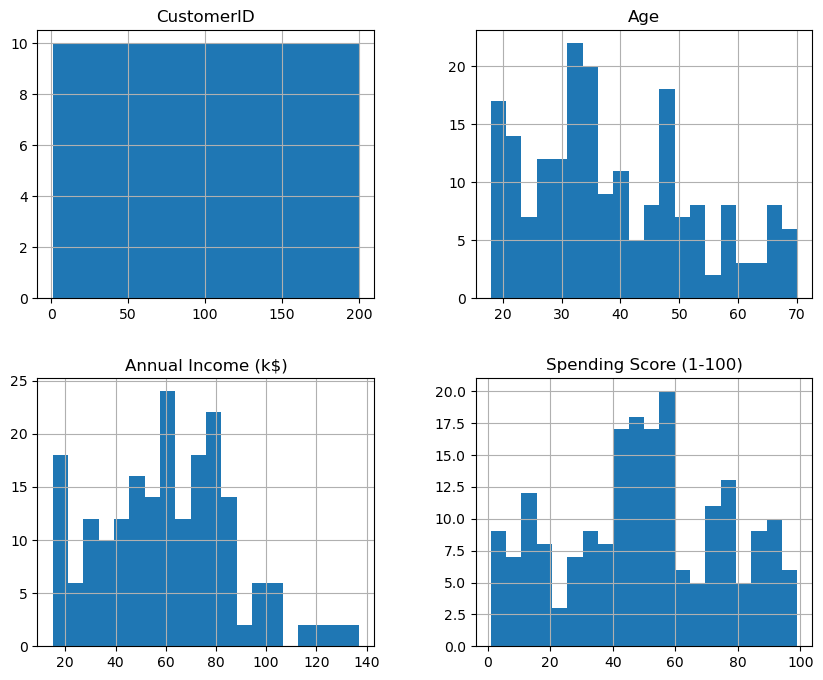

In [44]:
data.hist(figsize=(10, 8), bins=20)
plt.show()

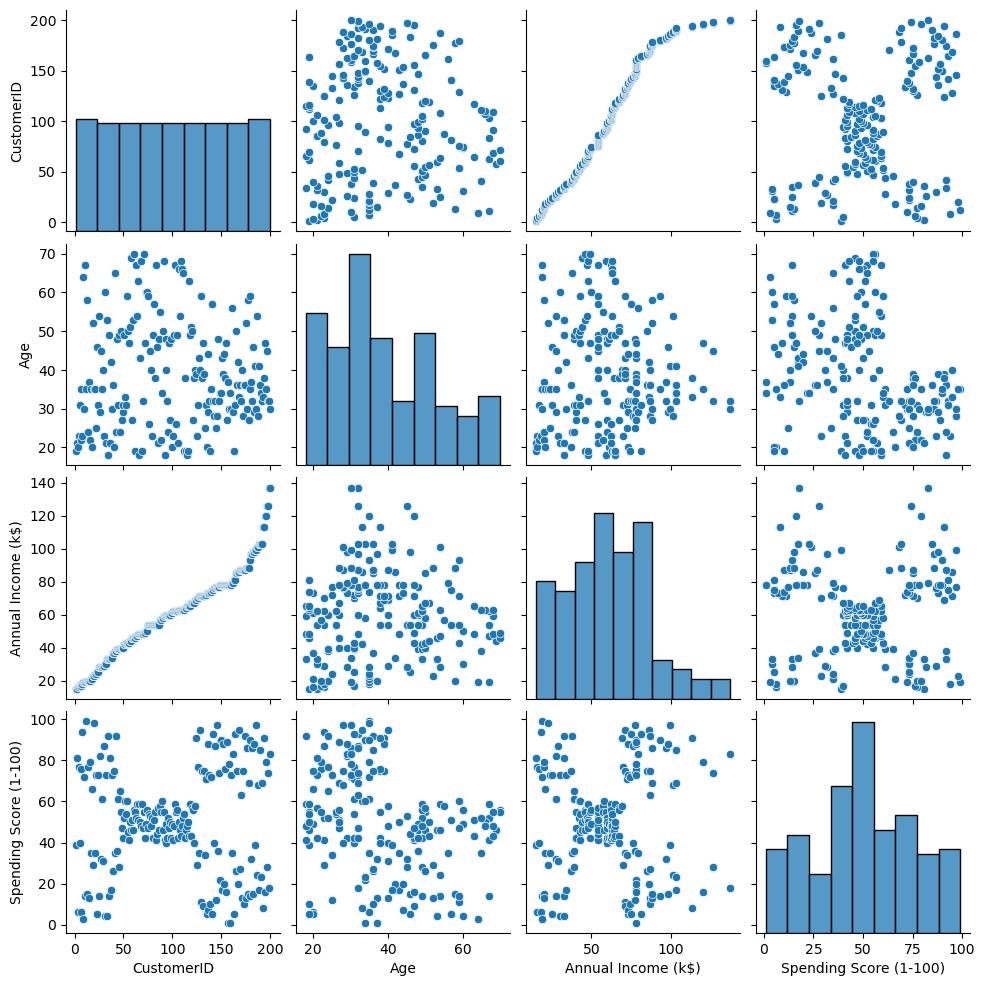

In [45]:
sns.pairplot(data)
plt.show()

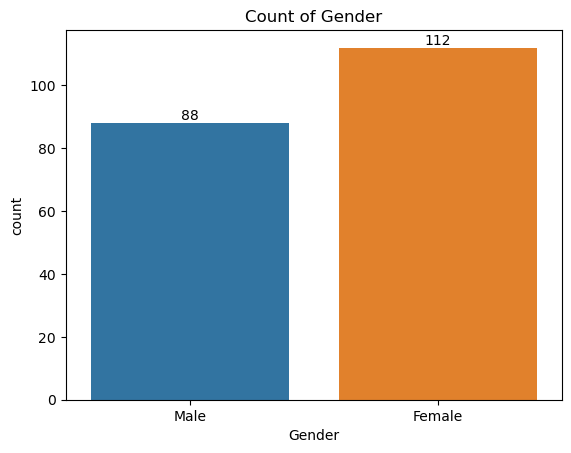

In [46]:
sns.countplot(x='Gender', data=data)
plt.title('Count of Gender')
for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,  
        p.get_height(),                 
        int(p.get_height()),            
        ha='center', va='bottom'        
    )
plt.show()

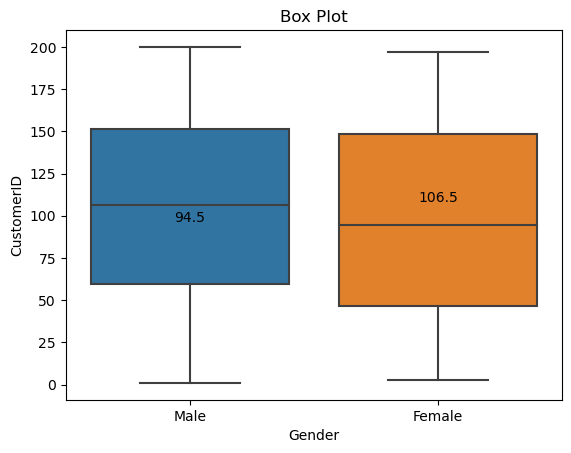

In [47]:
sns.boxplot(x='Gender', y='CustomerID', data=data)
plt.title('Box Plot')
medians = data.groupby('Gender')['CustomerID'].median()
for i, (gender, median) in enumerate(medians.items()):
    plt.text(i, median, f'{median:.1f}', ha='center', va='bottom')
plt.show()

In [48]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

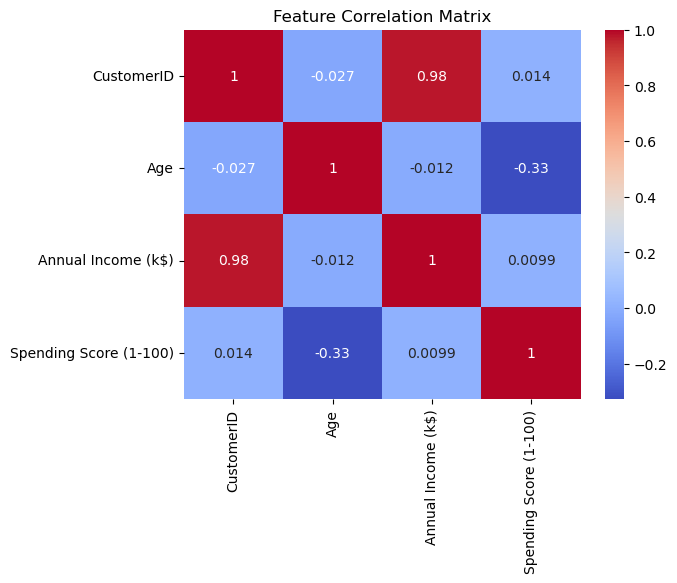

In [49]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

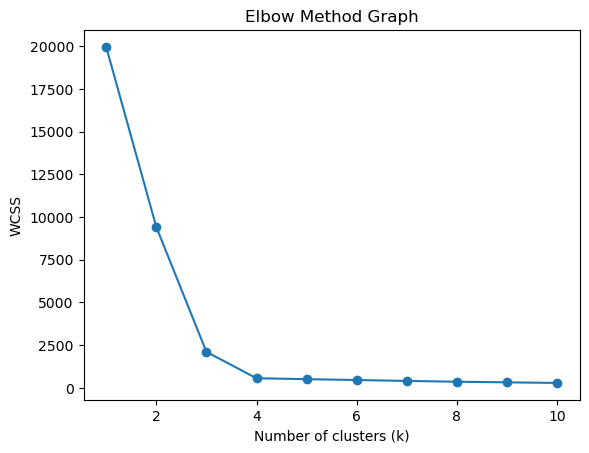

In [50]:
X,y = make_blobs(n_samples=300, centers=4, random_state=42)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

k = 2, Silhouette Score = 0.596
k = 3, Silhouette Score = 0.761
k = 4, Silhouette Score = 0.791
k = 5, Silhouette Score = 0.663
k = 6, Silhouette Score = 0.561
k = 7, Silhouette Score = 0.441
k = 8, Silhouette Score = 0.337
k = 9, Silhouette Score = 0.347


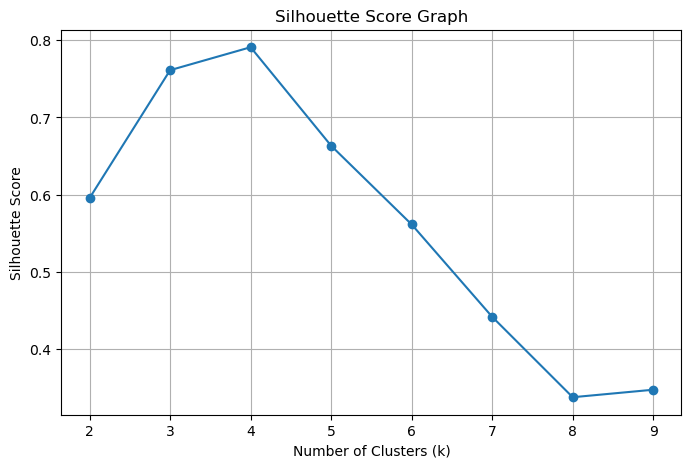

In [51]:
X,y= make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0, random_state=42)
k_values = range(2, 10)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score Graph")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [52]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

print(Y)

[3 1 2 0 4 4 3 4 2 1 2 0 2 0 1 2 0 3 3 0 2 0 2 3 3 4 1 3 3 0 4 0 0 0 4 4 2
 2 3 3 1 2 0 0 0 2 2 2 1 3 4 0 3 4 2 0 0 3 4 3 3 0 1 3 2 1 4 3 2 4 2 1 4 3
 0 3 0 4 2 0 4 2 1 0 3 3 3 3 2 0 3 1 2 4 2 3 0 2 0 3 2 2 2 3 3 0 0 3 0 3 1
 3 3 3 3 1 2 3 4 4 0 2 1 2 3 2 2 4 1 3 3 2 2 4 2 3 3 3 2 2 4 3 2 2 4 3 3 0
 0 0 4 1 2 2 0 3 0 3 4 4 3 3 2 2 1 0 2 1 3 3 4 0 0 3 3 0 0 1 4 1 0 3 0 0 3
 3 0 2 0 4 1 3 3 4 0 4 0 0 3 4 0 0 1 3 2 3 4 2 2 3 3 4 3 0 0 4 0 3 0 2 2 0
 3 0 2 0 0 4 1 2 4 2 0 1 3 4 0 4 2 2 2 1 0 2 3 3 2 0 0 4 0 0 0 0 2 2 3 0 4
 2 0 0 3 0 1 4 2 0 2 4 0 0 2 3 0 0 0 2 3 1 0 2 2 0 4 0 2 3 2 4 4 0 0 2 3 2
 3 2 4 2 4 3 2 2 0 2 4 1 2 2 1 3 2 2 2 1 3 2 2 2 3 2 2 3 3 3 4 3 3 3 3 3 0
 3 2 3 0 0 3 2 2 2 0 0 4 0 1 0 2 4 4 2 1 3 3 4 3 0 1 0 2 0 1 4 3 2 1 2 2 3
 0 4 2 4 3 2 3 2 3 3 4 3 0 4 3 1 0 4 3 4 3 2 0 0 1 1 2 0 0 0 2 3 4 0 2 2 4
 3 4 4 4 0 2 1 0 2 0 0 2 0 2 0 3 4 2 0 4 3 0 2 2 1 4 1 3 4 2 3 0 0 3 2 3 2
 0 1 1 1 0 2 2 3 0 1 4 4 2 4 0 2 3 2 4 2 0 2 0 2 4 0 3 3 0 0 3 3 0 4 2 1 2
 0 3 3 0 4 3 3 2 3 3 0 3 

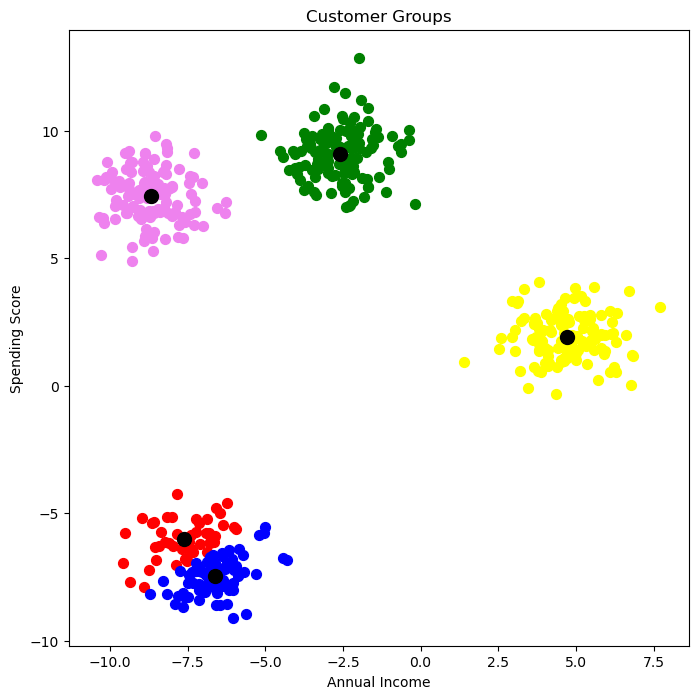

In [53]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()